In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from beakerx import *

### Import data

In [2]:
DATADIR = os.path.join(os.getenv("DATA_DIR"), 'processed_journey')
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [3]:
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [4]:
journeys1 = pd.read_csv(os.path.join(DATADIR, "dlo_prelim_meta_standard_with_pageseq_from_29-10_to_01-11-2018.csv.gz"), compression='gzip')

In [5]:
journeys1.shape

(3788851, 15)

In [6]:
journeys1.head(10)

,Sequence,Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence,Event_List,num_event_cats,Event_cats_agg,Event_cat_act_agg,Page_List_NL,Page_Seq_NL,Page_Seq_Occurrences,Occurrences_NL
0,/sure-start-maternity-grant/how-to-claim<<PAGE...,104,"[('mobile', 50), ('desktop', 50), ('tablet', 4)]","[('20181031', 34), ('20181029', 31), ('2018110...","[('/sure-start-maternity-grant/how-to-claim', ...","['/sure-start-maternity-grant/how-to-claim', '...",/sure-start-maternity-grant/how-to-claim>>/gov...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",3,"[('PAGE_NULL', 2), ('External Link Clicked', 1...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('External ...","['/sure-start-maternity-grant/how-to-claim', '...",/sure-start-maternity-grant/how-to-claim>>/gov...,139,2552
1,/government/collections/data-protection-act-20...,120,"[('mobile', 13), ('desktop', 102), ('tablet', 5)]","[('20181031', 33), ('20181029', 39), ('2018110...",[('/government/collections/data-protection-act...,['/government/collections/data-protection-act-...,/government/collections/data-protection-act-20...,"[('PAGE_NULL', 'PAGE_NULL'), ('navDocumentColl...",3,"[('PAGE_NULL', 2), ('navDocumentCollectionLink...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('navDocume...",['/government/collections/data-protection-act-...,/government/collections/data-protection-act-20...,233,7763
2,/contact-the-dvla<<PAGE<:<NULL<:<NULL>>/contac...,92,"[('desktop', 26), ('mobile', 54), ('tablet', 12)]","[('20181031', 36), ('20181029', 29), ('2018110...","[('/contact-the-dvla', 'PAGE<:<NULL<:<NULL'), ...","['/contact-the-dvla', '/contact-the-dvla/y', '...",/contact-the-dvla>>/contact-the-dvla/y>>/conta...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",3,"[('PAGE_NULL', 4), ('Simple Smart Answer', 1),...","[(('PAGE_NULL', 'PAGE_NULL'), 4), (('Simple Sm...","['/contact-the-dvla', '/contact-the-dvla/y', '...",/contact-the-dvla>>/contact-the-dvla/y>>/conta...,223,6398
3,/find-local-council<<PAGE<:<NULL<:<NULL>>/find...,105,"[('desktop', 91), ('mobile', 12), ('tablet', 2)]","[('20181031', 33), ('20181029', 26), ('2018110...","[('/find-local-council', 'PAGE<:<NULL<:<NULL')...","['/find-local-council', '/find-local-council/g...",/find-local-council>>/find-local-council/green...,"[('PAGE_NULL', 'PAGE_NULL'), ('postcodeSearch:...",2,"[('PAGE_NULL', 2), ('postcodeSearch:find_local...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('postcodeS...","['/find-local-council', '/find-local-council/g...",/find-local-council>>/find-local-council/green...,213,7049
4,/government/publications/civil-service-compete...,99,"[('mobile', 24), ('desktop', 66), ('tablet', 9)]","[('20181031', 34), ('20181029', 23), ('2018110...",[('/government/publications/civil-service-comp...,['/government/publications/civil-service-compe...,/government/publications/civil-service-compete...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",2,"[('PAGE_NULL', 2), ('Download Link Clicked', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('Download ...",['/government/publications/civil-service-compe...,/government/publications/civil-service-compete...,896,46393
5,/personal-tax-account<<PAGE<:<NULL<:<NULL>>/pe...,386,"[('desktop', 185), ('mobile', 163), ('tablet',...","[('20181031', 137), ('20181029', 120), ('20181...","[('/personal-tax-account', 'PAGE<:<NULL<:<NULL...","['/personal-tax-account', '/personal-tax-accou...",/personal-tax-account>>/personal-tax-account/s...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",2,"[('PAGE_NULL', 3), ('Radio button chosen', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 3), (('Radio but...","['/personal-tax-account', '/personal-tax-accou...",/personal-tax-account>>/personal-tax-account/s...,3879,1157083
6,/government/publications/application-to-transf...,474,"[('desktop', 289), ('tablet', 63), ('mobile', ...","[('20181031', 134), ('20181029', 151), ('20181...",[('/government/publications/application-to-tra...,['/government/publications/application-to-tran...,/government/publications/application-to-transf...,"[('

### Sample data for speed

In [7]:
journeys = journeys1.sample(frac=0.01, random_state=1234).copy()

In [8]:
journeys.shape

(37889, 15)

### derive variables (create features...)

In [9]:
journeys['page_list_eval'] = journeys['Page_List'].map(pd.eval)
journeys['page_seq_len'] = journeys['page_list_eval'].map(len)

In [10]:
journeys['page_list_NL_eval'] = journeys['Page_List_NL'].map(pd.eval)
journeys['page_seq_len_NL'] = journeys['page_list_NL_eval'].map(len)

In [11]:
# def contains_search(Page_List):
#     search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             search_in_sequence = 1
            
#     return search_in_sequence

# def count_search(Page_List):
#     times_search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             times_search_in_sequence += 1
#     return times_search_in_sequence


# # journeys['contains_search'] = list(map(contains_search, journeys['Page_List']))

# journeys['count_search'] = list(map(count_search, journeys['Page_List']))

In [12]:
journeys['count_search'] = journeys.PageSequence.str.count("/search?")+journeys.PageSequence.str.count("/search/")

In [13]:
journeys['event_list_contains_start'] = np.where(journeys.Event_List.str.contains("start"), 1, 0)
journeys['page_seq_contains_start'] = np.where(journeys.Sequence.str.contains("start"), 1, 0)
journeys['page_seq_contains_service.gov.uk'] = np.where(journeys.Sequence.str.contains("service.gov.uk"), 1, 0)

In [14]:
journeys['contains_search_regex'] = np.where((journeys.PageSequence.str.contains("/search?")) | (journeys.PageSequence.str.contains("/search/")), 1, 0)

Get differnet results when using the contains_search function iterating over pagelist to the regex function in PageSequence. It would be good to understand why. 

In [15]:
journeys['contains_search_n'] = journeys['contains_search_regex']*journeys['Page_Seq_Occurrences']

In [16]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [17]:
def count_desktop(DeviceCategories): 
    thelist  = pd.eval(DeviceCategories)
    desktop = 0
    mobile = 0
    other = 0
    for i in range(len(thelist)):
        if thelist[i][0] =='desktop':
            desktop = thelist[i][1]
        elif thelist[i][0] =='mobile':
            mobile = thelist[i][1]
        else:
            other = thelist[i][1]      
    return desktop, mobile, other

### Device used

In [18]:
journeys['desktop'], journeys['mobile'], journeys['other_device'] = zip(*journeys['DeviceCategories'].map(count_desktop))

In [19]:
journeys['more_desktop'] = np.where(journeys['desktop'] > (journeys['mobile']+journeys['other_device']), 1, 0)

more_desktop
0    16304
1    21585
dtype: int64


<Figure size 2160x2160 with 0 Axes>

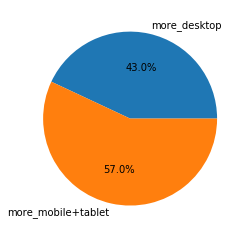

<Figure size 2160x2160 with 0 Axes>

In [20]:
print(journeys.groupby('more_desktop').size())
plt.pie(journeys.groupby('more_desktop').size(), labels=['more_desktop', 'more_mobile+tablet'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

### journey length - Don't forget this data is only in journeys of more than 1 page
### Think need to combine with klo for this. Also see what Matt's done already

EEK, be careful of frequency counts because need to include Occurences column for this. This is harder to interpret than it looks

In [21]:
journeys['page_seq_len'].describe()

count    37889.000000
mean         6.496556
std          7.277339
min          2.000000
25%          3.000000
50%          4.000000
75%          7.000000
max        423.000000
Name: page_seq_len, dtype: float64

### Make a long df a row for each session

In [22]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','final_page','page_seq_len', 'page_seq_len_NL', 'event_list_contains_start', 'count_search', 'contains_search_regex', 'page_list_NL_eval', 'Page_Seq_NL', 'page_seq_contains_start', 'page_seq_contains_service.gov.uk']].copy()
#repeat rows for each occurrence
journey_expanded =  slim.loc[slim.index.repeat(slim['Occurrences'])].copy()


In [23]:
journey_expanded['page_seq_len'].describe()

count    62513.000000
mean         4.906995
std          6.032192
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        423.000000
Name: page_seq_len, dtype: float64

In [24]:
journey_expanded['page_seq_len_NL'].describe()

count    62513.000000
mean         4.496985
std          5.760530
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        421.000000
Name: page_seq_len_NL, dtype: float64

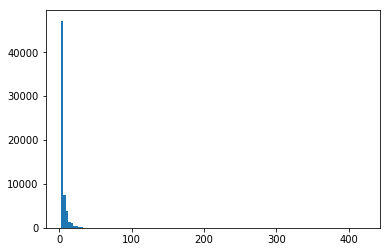

In [25]:
journey_expanded['page_seq_len'].hist(bins=122, grid=False)

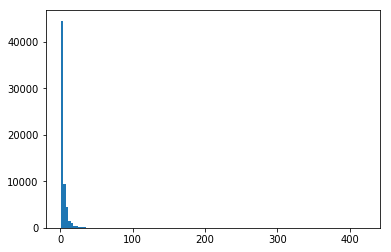

In [26]:
journey_expanded['page_seq_len_NL'].hist(bins=122, grid=False)

### Search counts

In [27]:
print("{}/{} ({}%) of journeys contain internal search in their path".format(journeys['contains_search_n'].sum(),
                                                                             journeys['Page_Seq_Occurrences'].sum(),
                                                                             journeys['contains_search_n'].sum()/journeys['Page_Seq_Occurrences'].sum()*100))

585019/21872391 (2.6746915780721%) of journeys contain internal search in their path


In [28]:
data = []
for i in range(journeys['page_seq_len'].max()):
    df = journeys[journeys['page_seq_len']==i]
    if df['Page_Seq_Occurrences'].sum()>1:
            percent = round(df['contains_search_n'].sum()/df['Page_Seq_Occurrences'].sum()*100, 1)
            n = df['contains_search_n'].sum()
            denom = df['Page_Seq_Occurrences'].sum()
            p = percent/100
            variance = (p*(1-p))/denom
            data.append([i+1, n, denom, percent, variance])

search_seqlength = pd.DataFrame(data, columns=['length', 'n', 'denom','percent', 'variance'])

In [29]:
search_seqlength.iloc[10:27]

,length,n,denom,percent,variance
10,13,130,729,17.8,0.000201
11,14,116,606,19.1,0.000255
12,15,85,462,18.4,0.000325
13,16,81,389,20.8,0.000423
14,17,68,339,20.1,0.000474
15,18,78,252,31.0,0.000849
16,19,51,241,21.2,0.000693
17,20,35,182,19.2,0.000852
18,21,42,157,26.8,0.001250
19,22,30,141,21.3,0.001189


In [30]:
search_seqlength['length'].describe()

count     75.000000
mean      42.306667
std       25.914085
min        3.000000
25%       21.500000
50%       40.000000
75%       58.500000
max      108.000000
Name: length, dtype: float64

Text(0, 0.5, 'Percent of journeys used internal search')

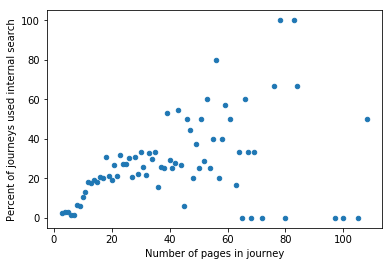

In [31]:
ax = search_seqlength.plot.scatter(x='length', y='percent')
ax.set_xlabel("Number of pages in journey")
ax.set_ylabel("Percent of journeys used internal search")

(0, 312)

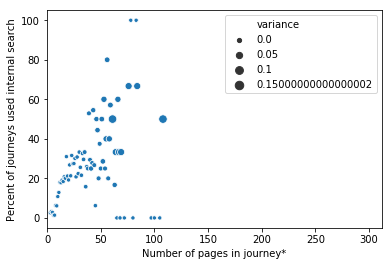

In [32]:
ax = sns.scatterplot(x="length", y="percent", size="variance", data=search_seqlength)
ax.set_xlabel("Number of pages in journey*")
ax.set_ylabel("Percent of journeys used internal search")
ax.set_xlim(0, 312)

In [33]:
longerthan3 = journeys[journeys['page_seq_len']>3]

print("{}/{} ({}%) of longerthan3 contain internal search in their path".format(longerthan3['contains_search_n'].sum(),
                                                                             longerthan3['Page_Seq_Occurrences'].sum(),
                                                                             longerthan3['contains_search_n'].sum()/longerthan3['Page_Seq_Occurrences'].sum()*100))

13877/493882 (2.8097804738783756%) of longerthan3 contain internal search in their path


In [34]:
journeys[journeys['contains_search_regex']==1].page_seq_len.describe()

count    5299.000000
mean        8.692772
std         9.215161
min         2.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       236.000000
Name: page_seq_len, dtype: float64

In [35]:
journeys.page_seq_len.describe()

count    37889.000000
mean         6.496556
std          7.277339
min          2.000000
25%          3.000000
50%          4.000000
75%          7.000000
max        423.000000
Name: page_seq_len, dtype: float64

In [36]:
journeys['count_search'].describe()

count    37889.000000
mean         0.284832
std          1.093474
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: count_search, dtype: float64

In [37]:
journeys[journeys['contains_search_regex']==1].count_search.describe()

count    5299.000000
mean        2.036611
std         2.232135
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        33.000000
Name: count_search, dtype: float64

Text(0, 0.5, 'Number of journeys')

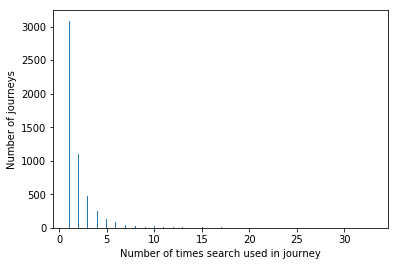

In [38]:
ax = journeys[journeys['contains_search_regex']==1].count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")

(0, 10)

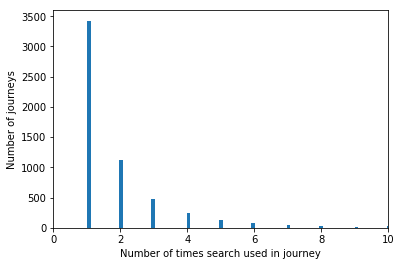

In [39]:
ax = journey_expanded[journey_expanded['contains_search_regex']==1].count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")
ax.set_xlim(0, 10)

(0, 10)

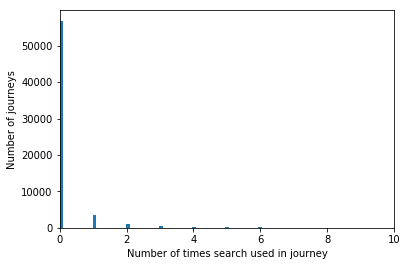

In [40]:
ax = journey_expanded.count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")
ax.set_xlim(0, 10)

(0, 312)

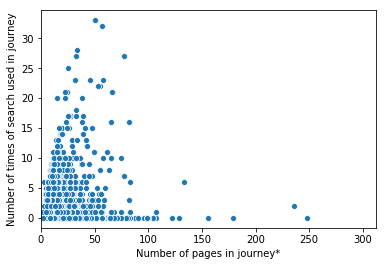

In [41]:
ax = sns.scatterplot(x="page_seq_len", y="count_search", data=journey_expanded)
ax.set_xlabel("Number of pages in journey*")
ax.set_ylabel("Number of times of search used in journey")
ax.set_xlim(0, 312)

In [42]:
# f, ax = plt.subplots(figsize=(6, 6))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(journey_expanded.page_seq_len, journey_expanded.count_search, cmap=cmap, n_levels=1000, shade=True)
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 10)

In [43]:
# f, ax = plt.subplots(figsize=(6, 6))
# sns.kdeplot(journey_expanded.page_seq_len, journey_expanded.count_search, ax=ax)
# sns.rugplot(journey_expanded.page_seq_len, color="g", ax=ax)
# sns.rugplot(journey_expanded.count_search, vertical=True, ax=ax)


In [44]:
# with sns.axes_style("white"):
#     sns.jointplot(x=journey_expanded.page_seq_len, y=journey_expanded.count_search, kind="hex", color="k")

In [45]:
longerthan10 = journey_expanded[journey_expanded['page_seq_len']>10]

(0, 100)

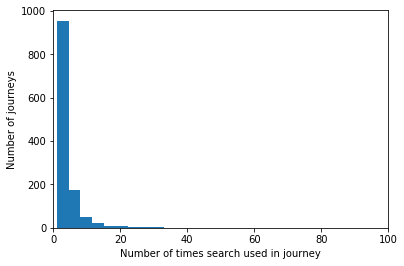

In [46]:
ax = longerthan10[longerthan10['contains_search_regex']==1].count_search.hist(bins=9, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")
ax.set_xlim(0, 100)

In [47]:
longerthan10[longerthan10['contains_search_regex']==1].count_search.describe()

count    1229.000000
mean        3.519935
std         3.874955
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        33.000000
Name: count_search, dtype: float64

In [48]:
longerthan10[longerthan10['contains_search_regex']==1].shape

(1229, 11)

In [49]:
longerthan10.shape

(5371, 11)

### Most frequent pages

In [50]:
# lst_col = 'Page_Seq_NL'

# r = pd.DataFrame({
#       col:np.repeat(journey_expanded[col].values, journey_expanded[lst_col].str.len())
#       for col in journey_expanded.columns.drop(lst_col)}
#     ).assign(**{lst_col:np.concatenate(journey_expanded[lst_col].values)})[journey_expanded.columns]

In [51]:
journey_expanded['journey_type'] = journey_expanded.index

In [52]:
journey_expanded.reset_index(inplace=True)
journey_expanded['journey'] = journey_expanded.index

In [53]:
journey_expanded.head()

,index,Occurrences,final_page,page_seq_len,page_seq_len_NL,event_list_contains_start,count_search,contains_search_regex,page_list_NL_eval,Page_Seq_NL,page_seq_contains_start,page_seq_contains_service.gov.uk,journey_type,journey
0,1617653,1,/browse/business/premises-rates,4,4,0,1,1,"[/government/organisations/hm-revenue-customs,...",/government/organisations/hm-revenue-customs>>...,0,0,1617653,0
1,3403926,1,/business-finance-support?keywords=&types_of_s...,5,5,0,0,0,"[/business-finance-support, /business-finance-...",/business-finance-support>>/business-finance-s...,1,0,3403926,1
2,3092147,1,/vehicle-tax,4,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,3092147,2
3,2209774,1,/eu-withdrawal-act-2018-statutory-instruments/...,3,1,0,0,0,[/eu-withdrawal-act-2018-statutory-instruments...,/eu-withdrawal-act-2018-statutory-instruments/...,0,1,2209774,3
4,1739499,1,/guidance/immigration-rules/immigration-rules-...,7,7,0,0,0,[/government/organisations/uk-visas-and-immigr...,/government/organisations/uk-visas-and-immigra...,0,0,1739499,4


In [54]:
#this gives me a new row for every page in the no loop page list in the data which already has a row for every occurrence
#so now each row represents a single occurrence of that page within a journey

s = journey_expanded.apply(lambda x: pd.Series(x['page_list_NL_eval']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'page'
page_expanded = journey_expanded.join(s).copy()

In [55]:
page_expanded.head()

,index,Occurrences,final_page,page_seq_len,page_seq_len_NL,event_list_contains_start,count_search,contains_search_regex,page_list_NL_eval,Page_Seq_NL,page_seq_contains_start,page_seq_contains_service.gov.uk,journey_type,journey,page
0,1617653,1,/browse/business/premises-rates,4,4,0,1,1,"[/government/organisations/hm-revenue-customs,...",/government/organisations/hm-revenue-customs>>...,0,0,1617653,0,/government/organisations/hm-revenue-customs
0,1617653,1,/browse/business/premises-rates,4,4,0,1,1,"[/government/organisations/hm-revenue-customs,...",/government/organisations/hm-revenue-customs>>...,0,0,1617653,0,/search?q=business+rates
0,1617653,1,/browse/business/premises-rates,4,4,0,1,1,"[/government/organisations/hm-revenue-customs,...",/government/organisations/hm-revenue-customs>>...,0,0,1617653,0,/correct-your-business-rates
0,1617653,1,/browse/business/premises-rates,4,4,0,1,1,"[/government/organisations/hm-revenue-customs,...",/government/organisations/hm-revenue-customs>>...,0,0,1617653,0,/browse/business/premises-rates
1,3403926,1,/business-finance-support?keywords=&types_of_s...,5,5,0,0,0,"[/business-finance-support, /business-finance-...",/business-finance-support>>/business-finance-s...,1,0,3403926,1,/business-finance-support


In [56]:
print("Total journeys = {} \nTotal NL journey types = {} \nMean number of journeys per journey type = {}".format(
    journey_expanded.shape[0],
    journey_expanded.Page_Seq_NL.nunique(),
    journey_expanded.shape[0]/journey_expanded.Page_Seq_NL.nunique()))

Total journeys = 62513 
Total NL journey types = 34461 
Mean number of journeys per journey type = 1.8140216476596733


In [57]:
print("Total journey made with loops = {} \nTotal journey types = {} \nTotal journey types without loops = {} \nTotal pages visited = {}".format(
    page_expanded.journey.nunique(),
    page_expanded.journey_type.nunique(),
    page_expanded.Page_Seq_NL.nunique(),
    page_expanded.shape[0]))

Total journey made with loops = 62513 
Total journey types = 37889 
Total journey types without loops = 34461 
Total pages visited = 281120


In [58]:
total_page_visits = page_expanded.shape[0]

In [59]:
page_expanded.groupby(['journey_type', 'journey']).size().describe()

count    62513.000000
mean         4.496985
std          5.760530
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        421.000000
dtype: float64

In [60]:
page_expanded.groupby([ 'journey']).size().describe()

count    62513.000000
mean         4.496985
std          5.760530
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        421.000000
dtype: float64

Oh good, this is distribution of number of pages per journey and now matches journey_expanded['page_seq_len_NL'].describe()

In [61]:
# So I don't want to have more than one row for a page if it appeared twice in a session.
# I think that's because we might expect pages to be viewed multiple times in a session for both the do-a-thing and chang-a-thing journeys
# So I'm going to drop duplicate rows for a page within the same journey

page_expanded_no_repeats = page_expanded.drop_duplicates(['journey', 'page']).copy()

In [62]:
print("Total journey made with loops = {} \nTotal journey types = {} \nTotal journey types without loops = {} \nUnique pages visited = {}".format(
    page_expanded_no_repeats.journey.nunique(),
    page_expanded_no_repeats.journey_type.nunique(),
    page_expanded_no_repeats.Page_Seq_NL.nunique(),
    page_expanded_no_repeats.shape[0]))

Total journey made with loops = 62513 
Total journey types = 37889 
Total journey types without loops = 34461 
Unique pages visited = 223855


In [63]:
print("So there were {} pages that were visited at least once in a journey and won't be counted from now".format(
page_expanded.shape[0]-page_expanded_no_repeats.shape[0]))

So there were 57265 pages that were visited at least once in a journey and won't be counted from now


In [64]:
print("The mean number of visits to a single page in a journey ={}".format(
    total_page_visits/page_expanded_no_repeats.shape[0]))

The mean number of visits to a single page in a journey =1.2558129146099037


In [65]:
page_expanded.groupby(['journey', 'page']).size().describe()

count    223855.000000
mean          1.255813
std           0.837007
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         197.000000
dtype: float64

Most journeys (>=75%) (without loops) only visit a page once. The average is 1.25 because a small number of jounreys visit a page many times

In [66]:
page_expanded_no_repeats.groupby([ 'page']).size().describe()

count    40177.000000
mean         5.571720
std         69.432428
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      10939.000000
dtype: float64

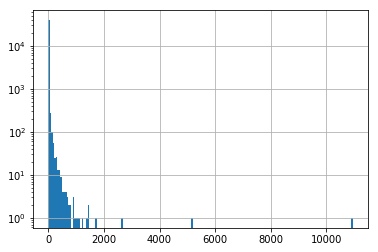

In [67]:
ax = page_expanded_no_repeats.groupby([ 'page']).size().hist(bins=200)
ax.set_yscale('log')

This is the distribution of number of journeys containing a page. Some pages are in lots of journeys (10000) and half of pages are only in one. The mean number of jounreys a page is in is 5.6. 

Theres a 2% of content in 80% of sessionz thing that defines mainstream for some people. Is it true?

In [68]:
print("There are {} different pages".format(
    page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).shape[0]))

unique_pages = page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).shape[0]

There are 40177 different pages


In [69]:
top_2_percent = page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * 0.02))

In [70]:
print("the top 2% of pages are visited in {}% of journeys".format(
    top_2_percent.sum()/page_expanded_no_repeats.groupby([ 'page']).size().sum()))

the top 2% of pages are visited in 0.5790936097027093% of journeys


In [71]:
percent = 0.13

print("the top {}% of pages are visited in {}% of journeys".format(
    percent * 100,
    page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * percent)).sum()/page_expanded_no_repeats.groupby([ 'page']).size().sum()))

the top 13.0% of pages are visited in 0.8021174420942128% of journeys


In [72]:
data = []
for i in np.arange(0.0, 1.0, 0.001):
    percent_of_pages = i*100
    n = page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * i)).sum()
    percent_of_journeys = n/page_expanded_no_repeats.groupby([ 'page']).size().sum()*100
    data.append([percent_of_pages, n, percent_of_journeys])

journey_to_content_relationship = pd.DataFrame(data, columns=['percent_of_pages', 'number_of_pages', 'percent_of_journeys'])

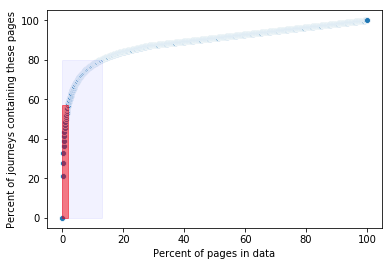

In [73]:
ax = sns.scatterplot(x="percent_of_pages", y="percent_of_journeys", data=journey_to_content_relationship)
ax.set_xlabel("Percent of pages in data")
ax.set_ylabel("Percent of journeys containing these pages")

# Create a Rectangle patch
rect = patches.Rectangle((0,0),2,57,linewidth=1,edgecolor='r',facecolor='red', fill=True, alpha=0.5)
rect2 = patches.Rectangle((0,0),13,80,linewidth=1,edgecolor='blue',facecolor='blue', fill=True, alpha=0.05)
# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)

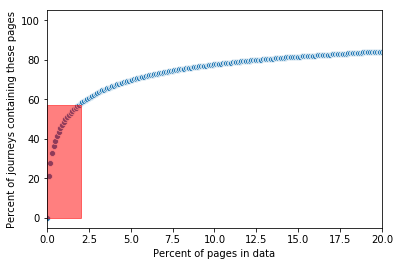

In [74]:


ax = sns.scatterplot(x="percent_of_pages", y="percent_of_journeys", data=journey_to_content_relationship)
ax.set_xlabel("Percent of pages in data")
ax.set_ylabel("Percent of journeys containing these pages")
ax.set_xlim(0, 20)

# Create a Rectangle patch
rect = patches.Rectangle((0,0),2,57,linewidth=1,edgecolor='r',facecolor='red', fill=True, alpha=0.5)

# Add the patch to the Axes
ax.add_patch(rect)

### journeys containing start pages

In [75]:
journey_expanded.event_list_contains_start.value_counts()

0    61696
1      817
Name: event_list_contains_start, dtype: int64

In [76]:
journey_expanded.event_list_contains_start.value_counts(normalize=True)

0    0.986931
1    0.013069
Name: event_list_contains_start, dtype: float64

In [77]:
journey_expanded.page_seq_contains_start.value_counts()

0    60969
1     1544
Name: page_seq_contains_start, dtype: int64

In [78]:
journey_expanded.page_seq_contains_start.value_counts(normalize=True)

0    0.975301
1    0.024699
Name: page_seq_contains_start, dtype: float64

<Figure size 2160x2160 with 0 Axes>

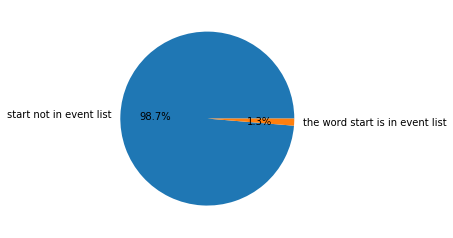

<Figure size 2160x2160 with 0 Axes>

In [79]:

plt.pie(journey_expanded.event_list_contains_start.value_counts(), labels=['start not in event list', 'the word start is in event list'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

<Figure size 2160x2160 with 0 Axes>

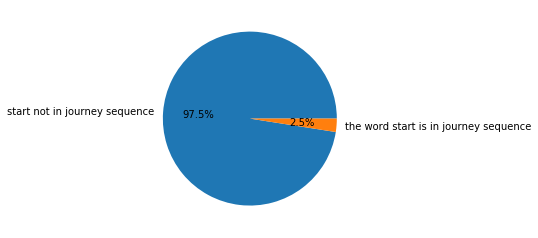

<Figure size 2160x2160 with 0 Axes>

In [80]:

plt.pie(journey_expanded.page_seq_contains_start.value_counts(), labels=['start not in journey sequence', 'the word start is in journey sequence'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

<Figure size 2160x2160 with 0 Axes>

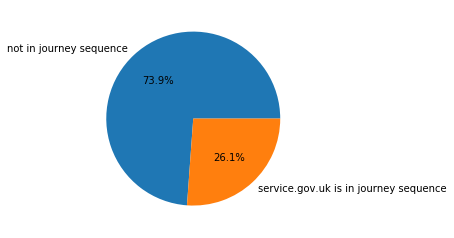

<Figure size 2160x2160 with 0 Axes>

In [81]:

plt.pie(journey_expanded['page_seq_contains_service.gov.uk'].value_counts(), labels=['not in journey sequence', 'service.gov.uk is in journey sequence'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

### End page

In [82]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [83]:
journeys['final_page'].nunique()

12752

In [84]:
journeys.shape

(37889, 30)

#### most frequent end pages

In [85]:
journey_expanded.groupby('final_page').size().describe()

count    12752.000000
mean         4.902211
std         61.579282
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5854.000000
dtype: float64

In [86]:
journey_expanded.groupby('final_page').size().sort_values(ascending=False).iloc[0:50]

final_page
/                                                                                                                     5854
/council-tax-bands                                                                                                    2615
/vehicle-tax                                                                                                          1084
/check-driving-information                                                                                             841
/log-in-register-hmrc-online-services                                                                                  814
/check-mot-history                                                                                                     789
/browse/benefits                                                                                                       662
/personal-tax-account/sign-in/prove-identity                                                                           559
/chec

#### Most number of 'ways' of getting there

In [87]:
print("On average there are {} journeys per exit page; ways of getting there".format(journeys.shape[0]/journeys['final_page'].nunique()))

On average there are 2.971220200752823 journeys per exit page; ways of getting there


In [88]:
unique_page_sequences = journeys.drop_duplicates('Page_Seq_NL')

In [89]:
unique_page_sequences.groupby('final_page').size().describe()

count    12752.000000
mean         2.702400
std         10.193761
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        455.000000
dtype: float64

In [90]:
pd.set_option('display.max_colwidth', -1)
unique_page_sequences[unique_page_sequences['final_page']=='/vehicle-tax'].head()

,Sequence,Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence,Event_List,num_event_cats,Event_cats_agg,...,event_list_contains_start,page_seq_contains_start,page_seq_contains_service.gov.uk,contains_search_regex,contains_search_n,final_page,desktop,mobile,other_device,more_desktop
3092147,/check-vehicle-tax<<PAGE<:<NULL<:<NULL>>/check-vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicleenquiry.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,1,"[('mobile', 1)]","[('20181102', 1)]","[('/check-vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/check-vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicleenquiry.service.gov.uk'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk')]","['/check-vehicle-tax', '/vehicle-tax', '/vehicle-tax', '/vehicle-tax']",/check-vehicle-tax>>/vehicle-tax>>/vehicle-tax>>/vehicle-tax,"[('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicleenquiry.service.gov.uk'), ('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk'), ('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk'), ('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk')]",2,"[('PAGE_NULL', 4), ('External Link Clicked', 6)]",...,0,0,1,0,0,/vehicle-tax,0,1,0,0
3379457,/change-name-address-v5c<<PAGE<:<NULL<:<NULL>>/government/publications/application-for-a-vehicle-registration-certificate<<PAGE<:<NULL<:<NULL>>/government/publications/application-for-a-vehicle-registration-certificate<<EVENT<:<Download Link Clicked<:</government/uploads/system/uploads/attachment_data/file/701449/v62-application-for-a-vehicle-registration-certificate.pdf>>/government/publications/application-for-a-vehicle-registration-certificate<<PAGE<:<NULL<:<NULL>>/government/publications/application-for-a-vehicle-registration-certificate<<EVENT<:<Download Link Clicked<:</government/uploads/system/uploads/attachment_data/file/701449/v62-application-for-a-vehicle-registration-certificate.pdf>>/government/publications/application-for-a-vehicle-registration-certificate<<PAGE<:<NULL<:<NULL>>/change-name-address-v5c<<PAGE<:<NULL<:<NULL>>/tell-dvla-changed-address<<PAGE<:<NULL<:<NULL>>/tell-dvla-changed-address<<EVENT<:<pageElementInteraction<:<stepNavShown>>/tell-dvla-changed-address<<EVENT<:<stepNavLinkClicked<:<2.1>>/change-name-address-v5c?step-by-step-nav=c1f13d41-ed7f-44a3-be11-fd95525ddf40<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,1,"[('mobile', 1)]","[('20181104', 1)]","[('/change-name-address-v5c', 'PAGE<:<NULL<:<NULL'), ('/government/publications/application-for-a-vehicle-registration-certificate', 'PAGE<:<NULL<:<NULL'), ('/government/publications/application-for-a-vehicle-regis

In [ ]:
unique_page_sequences.groupby('final_page').size().sort_values(ascending=False).plot(kind = 'barh',
                                                                           figsize=(10, 30),
                                                                           color='#2B8CC4'
                                                                           )

In [ ]:
journeys['final_page_type'] = 'other'
journeys.loc[journeys['final_page'].str.contains('/government/publications/', 'final_page_type')] = 'government_publication'
journeys.loc[journeys['final_page'].str.contains('log-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('sign-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('login', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('check', 'final_page_type')] = 'check'
journeys.loc[journeys['final_page'].str.contains('apply', 'final_page_type')] = 'apply'
journeys.loc[journeys['final_page'].str.contains('contact', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains('enquiries', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains(r'get-.*-information.*', 'final_page_type')] = 'get_information'
journeys.loc[journeys['final_page'].str.contains('send', 'final_page_type')] = 'send'
journeys.loc[journeys['final_page'].str.contains('find', 'final_page_type')] = 'find'
journeys.loc[journeys['final_page'].str.contains('calculat', 'final_page_type')] = 'calculate/calculator'
journeys.loc[journeys['final_page'].str.contains('order', 'final_page_type')] = 'order'
journeys.loc[journeys['final_page'].str.contains('manage', 'final_page_type')] = 'manage'
journeys.loc[journeys['final_page'].str.contains('update', 'final_page_type')] = 'update'
journeys.loc[journeys['final_page'].str.contains('eligibility', 'final_page_type')] = 'eligibility'
journeys.loc[journeys['final_page'].str.contains('estimate', 'final_page_type')] = 'estimate'
journeys.loc[journeys['final_page'].str.contains('renew', 'final_page_type')] = 'renew'
journeys.loc[journeys['final_page'].str.contains('pay', 'final_page_type')] = 'pay'
journeys.loc[journeys['final_page'].str.contains('claim', 'final_page_type')] = 'claim'
journeys.loc[journeys['final_page'].str.contains('change', 'final_page_type')] = 'change'

In [ ]:
journeys.groupby('final_page_type').size()

In [94]:
def groupby_percent(df, groupby_var, unit_var, figsize=(10, 5)):
    x = df.groupby(groupby_var).count().reset_index()
    x['percent'] = 100*x[unit_var]/x[unit_var].sum()
    x = x.sort_values(['percent'])

    s = pd.DataFrame(x[[groupby_var, unit_var,'percent']])

    return(s, x.plot(x=groupby_var, y='percent', kind='barh', figsize=figsize, color='#2B8CC4'))

In [ ]:
groupby_percent(journeys, 'final_page_type', 'Page_Seq_NL')

#### Final interaction with GOV.UK

In [ ]:
def get_end_page_event(Page_Event_List):          
    return pd.eval(Page_Event_List)[-1][-1]

In [ ]:
journeys['final_interaction'] = journeys['Page_Event_List'].map(get_end_page_event)

In [ ]:
pd.set_option('display.max_colwidth', -1)
journeys[journeys.final_interaction.str.contains('start')]

In [ ]:
journeys['final_interaction_type'] = journeys.final_interaction.str.extract(r'<:<(.*)<:<', expand=False)

In [ ]:
journeys['final_external_link'] = journeys.final_interaction.str.extract(r'EVENT<:<External Link Clicked<:(.*)', expand=False)

In [ ]:
journeys['exit_to_assessed_service'] = np.where(journeys['final_external_link'].str.contains(r'.*service.gov.uk.*', na=False), 1, 0)

In [ ]:
journeys['exit_to_assessed_service'].value_counts(normalize=True)

In [ ]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','exit_to_assessed_service']].copy()
#repeat rows for each occurrence
journey_expanded2 =  slim.loc[slim.index.repeat(slim['Occurrences'])]

In [ ]:
journey_expanded2['exit_to_assessed_service'].value_counts(normalize=True)

In [ ]:
plt.pie(journey_expanded2['exit_to_assessed_service'].value_counts(), labels=['did not exit to an assessed service', 'exited to an assessed service'], autopct='%1.1f%%')

In [ ]:
journeys['final_external_link_service'] = np.where(journeys.final_interaction.str.contains(r'<External Link Clicked<:(.*)', expand=False)

In [ ]:
groupby_percent(journeys, 'final_interaction_type', 'PageSequence', figsize=(5, 10))

In [ ]:
journeys.groupby('final_interaction_type').size().sort_values(ascending=False)

In [ ]:
print(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape)

print("{} out of {} ({}%) journeys ended in a page hit".format(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0]/journeys.shape[0]*100))

In [ ]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0]/journeys.shape[0]*100))

In [ ]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an specialist external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in aSpecialist-external-link".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in an download link clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a  contents clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a breadcrumbClicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a JavaScript Error".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a Simple Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a social media".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in yesNoFeedbackForm".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0]/journeys.shape[0]*100))